编写实现图像直方图单阈值分割的Ostu算法程序。

In [1]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
root_path = '/root/DIVP_project/'
image_path_blocks = "project04/proj04-images/building_original.tif"
image_path_airport = "project04/proj04-images/marion_airport.tif"
image_path_fingerprint = "project04/proj04-images/noisy_fingerprint.tif"
image_path_defective = "project04/proj04-images/defective_weld.tif"



In [3]:
image = cv2.imread(root_path + image_path_blocks, cv2.IMREAD_GRAYSCALE)
# 对image进行二值化处理 使用ostu算法
ret, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


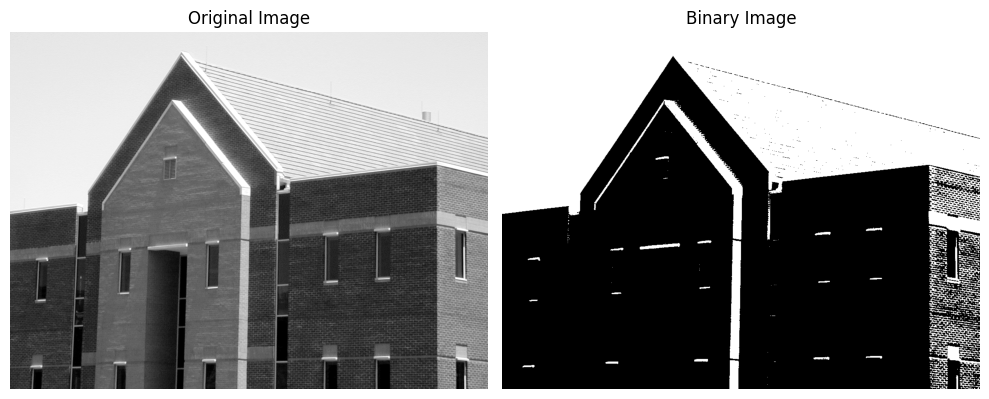

In [4]:
# 可视化image 和 binary
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:

def kmeans_thresholding(image, k=2, max_iter=10, epsilon=1.0):
    """
    使用 K-means 算法对灰度图像进行单阈值分割。
    
    参数：
        image: 输入的灰度图像
        k: 聚类的类别数（默认 2）
        max_iter: 最大迭代次数（默认 10）
        epsilon: 收敛阈值（默认 1.0）
    
    返回：
        segmented_image: 分割后的图像
        centers: 聚类中心
    """
    # 将图像转换为一维数据
    pixel_values = image.reshape((-1, 1)).astype(np.float32)

    # 定义 K-means 算法的停止条件
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

    # 使用 K-means 聚类
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # 将标签转换为图像格式
    segmented_image = centers[labels.flatten()].reshape(image.shape)
    
    # 返回分割结果和聚类中心
    return segmented_image.astype(np.uint8), centers


K-means 阈值: 147.7920684814453


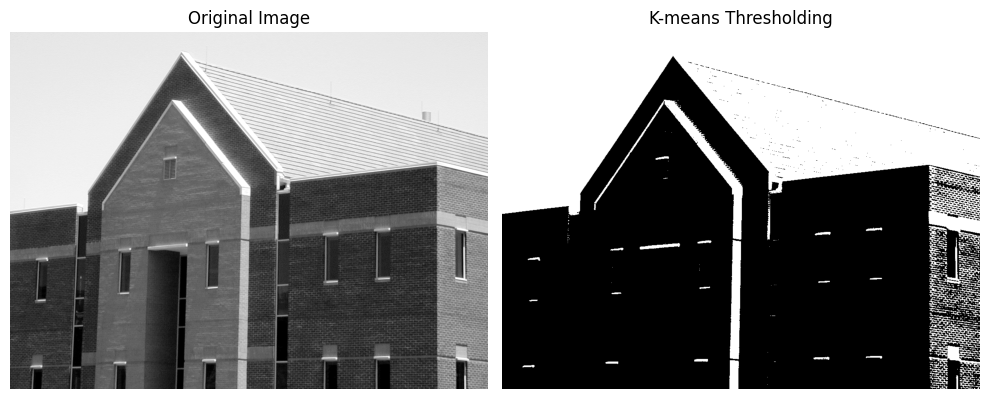

In [6]:


# 读取灰度图像
# image2 = cv2.imread(root_path + image_path_blocks, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("图像加载失败，请检查路径")
    exit()

# 使用 K-means 进行图像分割
segmented_image, centers = kmeans_thresholding(image, k=2)

# 根据中心值判断阈值（两类中心的中点）
threshold = np.mean(centers)
print(f"K-means 阈值: {threshold}")

# 显示原始图像和分割结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("K-means Thresholding")
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


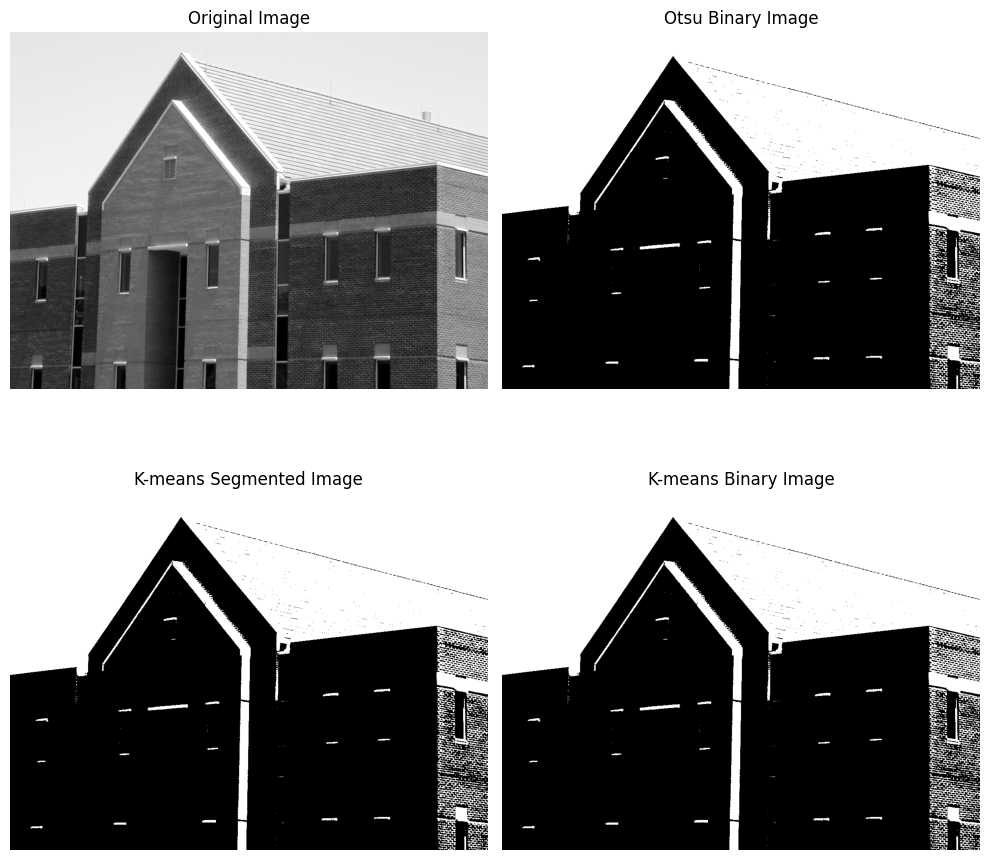

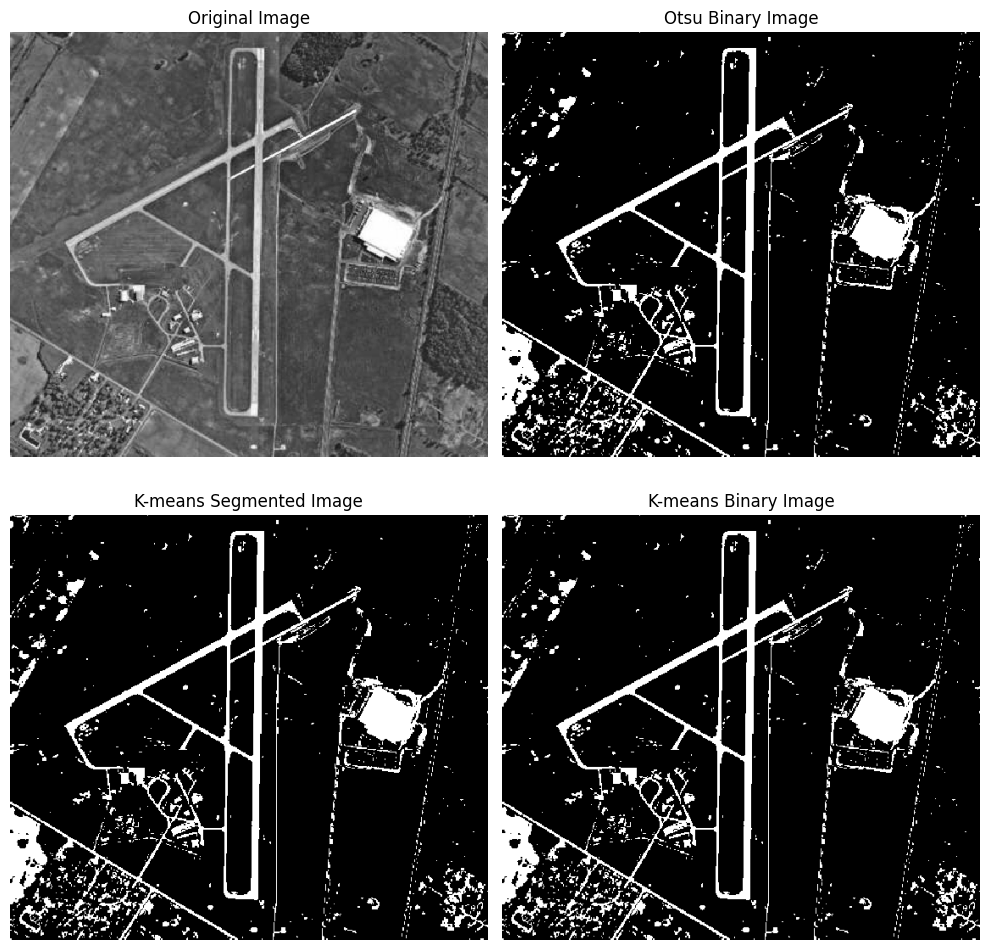

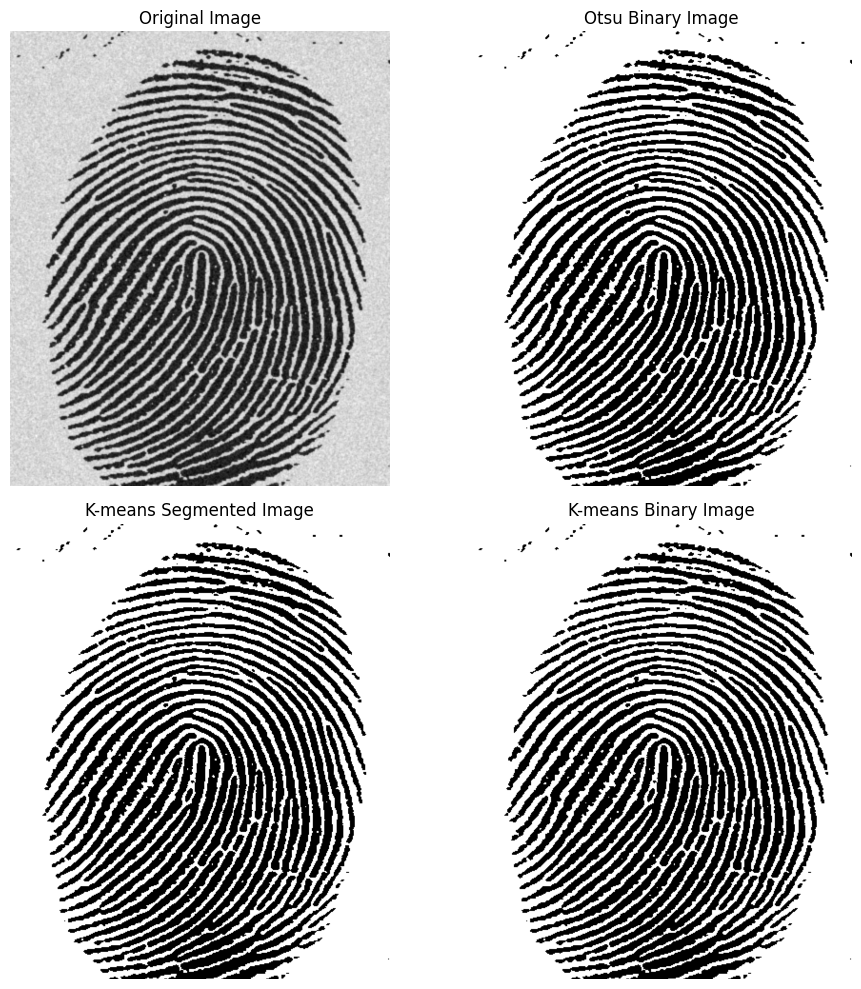

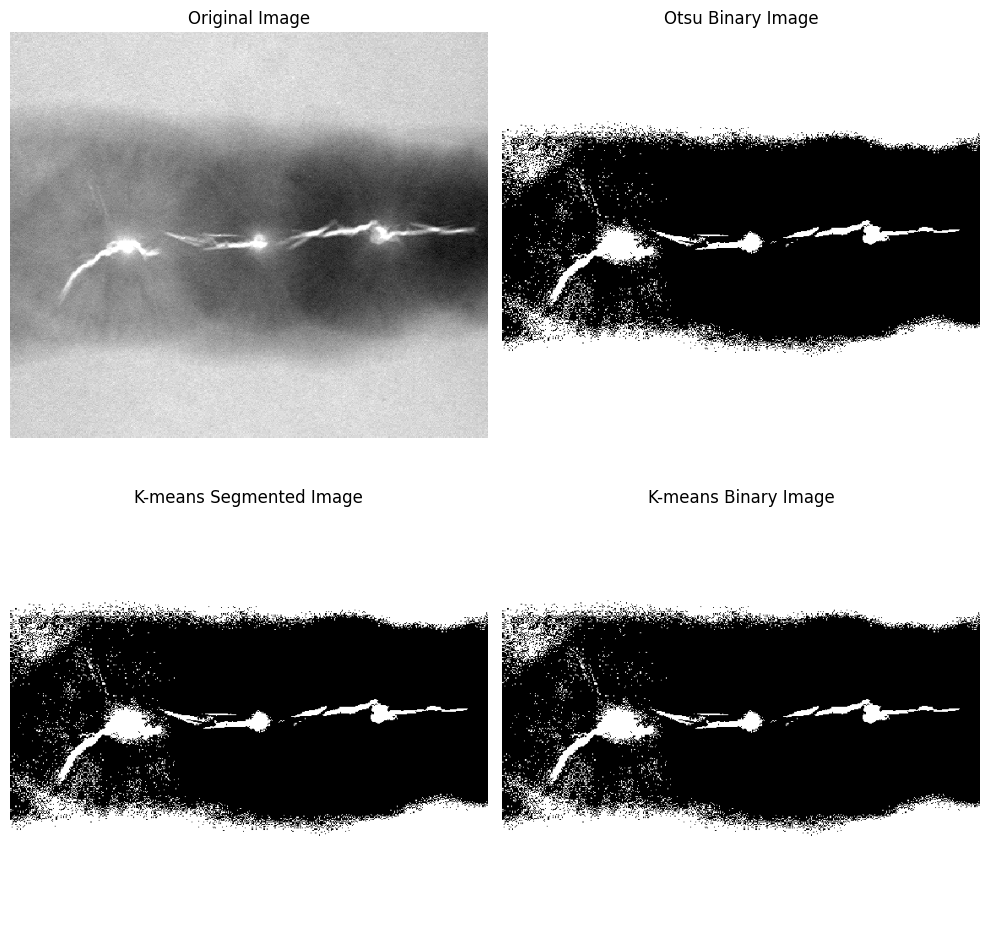

In [8]:
# 分别使用 Otsu 和 K-means 算法对图像进行二值化，图像分别是：image_path_blocks = "project04/proj04-images/building_original.tif"
#image_path_airport = "project04/proj04-images/marion_airport.tif"
#image_path_fingerprint = "project04/proj04-images/noisy_fingerprint.tif"
#image_path_defective = "project04/proj04-images/defective_weld.tif"
image_paths = [image_path_blocks, image_path_airport, image_path_fingerprint, image_path_defective]
for image_path in image_paths:
    # 读取灰度图像
    image = cv2.imread(root_path + image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("图像加载失败，请检查路径")
        continue

    # 使用 Otsu 算法进行二值化
    _, binary_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 使用 K-means 算法进行二值化
    segmented_image, centers = kmeans_thresholding(image, k=2)
    threshold = np.mean(centers)
    binary_kmeans = cv2.threshold(segmented_image, threshold, 255, cv2.THRESH_BINARY)[1]

    # 显示原始图像和二值化结果
    plt.figure(figsize=(10, 10))
    plt.subplot(221)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(222)
    plt.imshow(binary_otsu, cmap='gray')
    plt.title('Otsu Binary Image')
    plt.axis('off')
    plt.subplot(223)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('K-means Segmented Image')
    plt.axis('off')
    plt.subplot(224)
    plt.imshow(binary_kmeans, cmap='gray')
    plt.title('K-means Binary Image')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    